## Prueba las inicializaciones Uniforme, Predeterminada y Xavier Uniforme en el conjunto de datos MNIST usando la función de activación Tanh


<h3>Objetivo de este Notebook</h3>
<h5>1. Definir varias Redes Neuronales, función de criterio y optimizador</h5>
<h5>2. Probar las inicializaciones Uniforme, Predeterminada y Xavier</h5>


In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(0)

### Módulo de Red Neuronal y Función de Entrenamiento


Define el módulo o la clase de la red neuronal con Inicialización Xavier


In [2]:
# Define the neural network with Xavier initialization

class Net_Xavier(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Xavier, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.xavier_uniform_(linear.weight)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define el módulo de la red neuronal con Inicialización Uniforme:


In [3]:
# Define the neural network with Uniform initialization

class Net_Uniform(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net_Uniform, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            linear.weight.data.uniform_(0, 1)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define el módulo de la red neuronal con la Inicialización Predeterminada de PyTorch


In [4]:
# Define the neural network with Default initialization

class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            self.hidden.append(linear)

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.tanh(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

Define una función para entrenar el modelo; en este caso, la función devuelve un diccionario de Python para almacenar la pérdida de entrenamiento y la exactitud en los datos de validación.


In [5]:
# function to Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    loss_accuracy = {'training_loss':[], 'validation_accuracy':[]}

    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_accuracy['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label==y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        loss_accuracy['validation_accuracy'].append(accuracy)

    return loss_accuracy

### Genera unos datos


Carga el conjunto de datos de entrenamiento estableciendo el parámetro train en False y conviértelo en un tensor colocando un objeto de transformación en el argumento transform.

In [6]:
# Create the train dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Carga el conjunto de datos de prueba estableciendo el parámetro train en False y conviértelo en un tensor colocando un objeto de transformación en el argumento transform.

In [7]:
# Create the validation dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Crea los objetos *data loader* para los datos de entrenamiento y de validación


In [8]:
# Create Dataloader for both train dataset and validation dataset

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

### Define la Red Neuronal, la función de criterio, el optimizador y entrena el modelo


Crea la función de criterio:

In [9]:
# Define criterion function

criterion = nn.CrossEntropyLoss()

Crea el modelo con 100 capas ocultas

In [10]:
# Set the parameters

input_dim = 28 * 28
output_dim = 10
layers = [input_dim, 100, 10, 100, 10, 100, output_dim]
epochs = 15

## Prueba la Inicialización Predeterminada de PyTorch, la Inicialización Xavier y la Inicialización Uniforme


Entrena la red usando la Inicialización Predeterminada de PyTorch


In [11]:
# Train the model with default initialization

model = Net(layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

Entrena la red usando la función Inicialización Xavier


In [12]:
# Train the model with Xavier initialization

model_Xavier = Net_Xavier(layers)
optimizer = torch.optim.SGD(model_Xavier.parameters(), lr=learning_rate)
training_results_Xavier = train(model_Xavier, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

Entrena la red usando la Inicialización Uniforme


In [13]:
# Train the model with Uniform initialization

model_Uniform = Net_Uniform(layers)
optimizer = torch.optim.SGD(model_Uniform.parameters(), lr=learning_rate)
training_results_Uniform = train(model_Uniform, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

### Analiza resultados

Compara la pérdida de entrenamiento para cada función de activación:



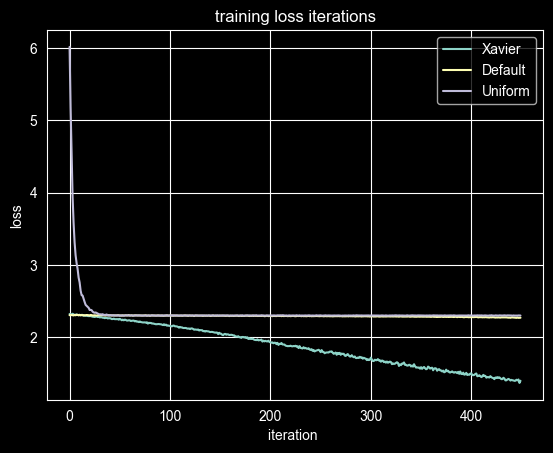

In [14]:
# Plot the loss

plt.plot(training_results_Xavier['training_loss'], label='Xavier')
plt.plot(training_results['training_loss'], label='Default')
plt.plot(training_results_Uniform['training_loss'], label='Uniform')
plt.ylabel('loss')
plt.xlabel('iteration ')
plt.title('training loss iterations')
plt.legend()

Compara la pérdida de validación para cada modelo:

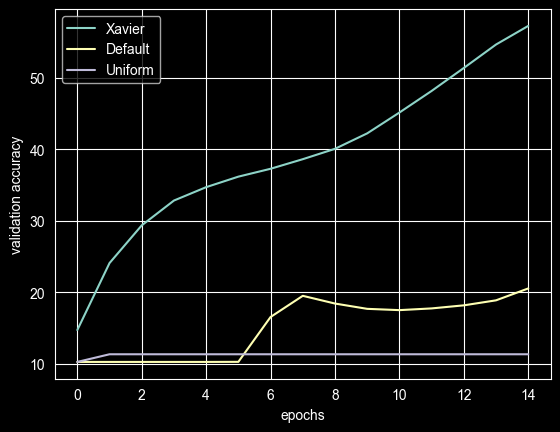

In [15]:
# Plot the accuracy

plt.plot(training_results_Xavier['validation_accuracy'], label='Xavier')
plt.plot(training_results['validation_accuracy'], label='Default')
plt.plot(training_results_Uniform['validation_accuracy'], label='Uniform')
plt.ylabel('validation accuracy')
plt.xlabel('epochs')
plt.legend()